In [ ]:
# !pip install pycaret

# Import Library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier, plot_importance

# Load Data Training

In [ ]:
dataset = pd.read_csv("/content/creditapproval-training.csv", sep=";")
dataset

,nama_nasabah,jenis_kelamin,umur,jml_pinjaman,jkw,jml_angsuran_per_bulan,type_pinjaman,jenis_pinjaman,bi_sektor_ekonomi,col,bi_golongan_debitur,bi_gol_penjamin,saldo_nominatif,tunggakan_pokok,tunggakan_bunga,status_kredit
0,x1,P,40.0,345000,1,345000,100,301,6000.0,1,874,875,345000,345000,0,MACET
1,x2,L,31.0,350000,7,55716,100,301,6000.0,1,874,875,390000,111428,0,MACET
2,x3,L,37.0,649926,6,108321,100,301,6000.0,1,874,875,649926,216642,0,MACET
3,x4,P,2.0,459168,12,38264,100,301,6000.0,1,874,875,459168,382640,0,MACET
4,x5,P,34.0,3055499,8,"381937,41",100,301,6000.0,1,874,875,3055499,"1527749,48",0,MACET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,x762,L,38.0,1000000,16,70000,100,301,6000.0,2,874,0,812500,812500,97500,MACET
762,x763,P,36.0,1000000,12,"90833,37",100,301,6000.0,2,874,0,429000,429000,45000,MACET
763,x764,L,28.0,2000000,10,260000,100,301,6000.0,2,874,0,600000,600000,180000,MACET
764,x765,P,31.0,1312500,7,198750,100,301,6000.0,2,874,0,1312500,1312500,78750,MACET


# Menelaah Data Training 1

In [ ]:
print("Jenis data setiap fitur:")
dataset.info()

Jenis data setiap fitur:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 0 to 765
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   nama_nasabah            766 non-null    object 
 1   jenis_kelamin           766 non-null    object 
 2   umur                    765 non-null    float64
 3   jml_pinjaman            766 non-null    object 
 4   jkw                     766 non-null    int64  
 5   jml_angsuran_per_bulan  766 non-null    object 
 6   type_pinjaman           766 non-null    int64  
 7   jenis_pinjaman          766 non-null    int64  
 8   bi_sektor_ekonomi       765 non-null    float64
 9   col                     766 non-null    int64  
 10  bi_golongan_debitur     766 non-null    int64  
 11  bi_gol_penjamin         766 non-null    int64  
 12  saldo_nominatif         766 non-null    object 
 13  tunggakan_pokok         766 non-null    object 
 14  tunggakan_bunga  

In [ ]:
print("Variable Jumlah Pinjaman:")
print(dataset['jml_pinjaman'].sample(5))

print("\nVariable Jumlah Angsuran:")
print(dataset['jml_angsuran_per_bulan'].sample(5))

print("\nVariable Saldo Nominatif:")
print(dataset['saldo_nominatif'].sample(5))

print("\nVariable Tunggakan Pokok:")
print(dataset['tunggakan_pokok'].sample(5))

print("\nVariable Tunggakan Bunga:")
print(dataset['tunggakan_bunga'].sample(5))

Variable Jumlah Pinjaman:
462    5000000
521    3000000
284     711250
392    1500000
361     500000
Name: jml_pinjaman, dtype: object

Variable Jumlah Angsuran:
603    236000
439    650000
388    105000
643    140000
168     86250
Name: jml_angsuran_per_bulan, dtype: object

Variable Saldo Nominatif:
390     656250
168    1200000
150    1218750
581    2312000
245    1050000
Name: saldo_nominatif, dtype: object

Variable Tunggakan Pokok:
543            0
526            0
616    583333,35
266    145833,33
710    380166,68
Name: tunggakan_pokok, dtype: object

Variable Tunggakan Bunga:
640     278400
714    15341,1
605          0
246          0
434          0
Name: tunggakan_bunga, dtype: object


Setelah melakukan pengecekan terhadap tipe data, ditemukan beberapa variabel yang seharusnya numerik namun pada dataset variabel tersebut berupa Object. Antara lain:
1.   jml_pinjaman
2.   jml_angsuran_per_bulan
3.   saldo_nominatif
4.   tunggakan_pokok
5.   tunggakan_bunga



Mengecek missing data pada dataset

In [ ]:
print(dataset.isna().sum())

nama_nasabah              0
jenis_kelamin             0
umur                      1
jml_pinjaman              0
jkw                       0
jml_angsuran_per_bulan    0
type_pinjaman             0
jenis_pinjaman            0
bi_sektor_ekonomi         1
col                       0
bi_golongan_debitur       0
bi_gol_penjamin           0
saldo_nominatif           0
tunggakan_pokok           0
tunggakan_bunga           0
status_kredit             0
dtype: int64


Setelah melakukan pengecekan terdapat masing-masing 1 missing value pada variabel umur dan bi_sektor_ekonomi

# Mengkonstruksi Data Training

Dilakukan untuk mengubah tipe data beberapa variabel yang seharusnya numerik

In [ ]:
kolom_konversi = ['jml_pinjaman', 'jml_angsuran_per_bulan', 'saldo_nominatif',
                  'tunggakan_pokok', 'tunggakan_bunga']

# Mengganti koma dengan titik dan mengonversi ke float pada setiap kolom
dataset[kolom_konversi] = dataset[kolom_konversi].apply(lambda x: x.str.replace(',', '.').astype(float))

In [ ]:
dataset.dtypes

,0
nama_nasabah,object
jenis_kelamin,object
umur,float64
jml_pinjaman,float64
jkw,int64
jml_angsuran_per_bulan,float64
type_pinjaman,int64
jenis_pinjaman,int64
bi_sektor_ekonomi,float64
col,int64


# Menelaah Data Training 2

*Melihat statistik deskriptif dataset*

In [ ]:
dataset.describe()

,umur,jml_pinjaman,jkw,jml_angsuran_per_bulan,type_pinjaman,jenis_pinjaman,bi_sektor_ekonomi,col,bi_golongan_debitur,bi_gol_penjamin,saldo_nominatif,tunggakan_pokok,tunggakan_bunga
count,765.000000,7.660000e+02,766.000000,7.660000e+02,766.0,766.000000,765.000000,766.000000,766.000000,766.000000,7.660000e+02,7.660000e+02,7.660000e+02
mean,29.160784,2.712483e+06,18.960836,2.333917e+05,100.0,301.197128,6013.045752,1.216710,873.968668,281.300261,2.007386e+06,7.900853e+05,8.771708e+04
std,263.165564,9.995602e+06,32.076029,5.489682e+05,0.0,0.822267,216.196305,0.412273,1.460257,408.099019,8.711282e+06,4.139217e+06,5.682318e+05
min,-7162.000000,8.333333e+04,1.000000,0.000000e+00,100.0,301.000000,6000.000000,1.000000,834.000000,0.000000,-4.000000e+06,0.000000e+00,0.000000e+00
25%,32.000000,8.489286e+05,8.000000,6.750000e+04,100.0,301.000000,6000.000000,1.000000,874.000000,0.000000,5.337500e+05,9.885424e+04,0.000000e+00
50%,38.000000,1.500000e+06,12.000000,1.050000e+05,100.0,301.000000,6000.000000,1.000000,874.000000,0.000000,9.462828e+05,3.391669e+05,0.000000e+00
75%,43.000000,2.000000e+06,20.000000,2.333334e+05,100.0,301.000000,6000.000000,1.000000,874.000000,875.000000,1.639582e+06,7.500000e+05,5.814889e+04
max,1043.000000,2.286550e+08,679.000000,1.035000e+07,100.0,305.000000,9990.000000,2.000000,876.000000,875.000000,2.094041e+08,9.161212e+07,1.100000e+07


Setelah melihat statistik deskriptif, ditemukan beberapa informasi, antara lain:

1. Variabel umur memiliki nilai max:1043 dan min: -7162.
2. Variabel jkw memiliki nilai max: 679 dan min: 1.
3. Variabel jenis_pinjaman memiliki nilai konstan, yaitu 100.
4. Nilai standar deviasi tertinggi ada pada variabel jml_pinjaman dengan value 9995602,066621464.
5. Nilai mean tertinggi ada pada variabel jml_pinjaman dengan value 2712482,630770235.

*Melihat Outlier*

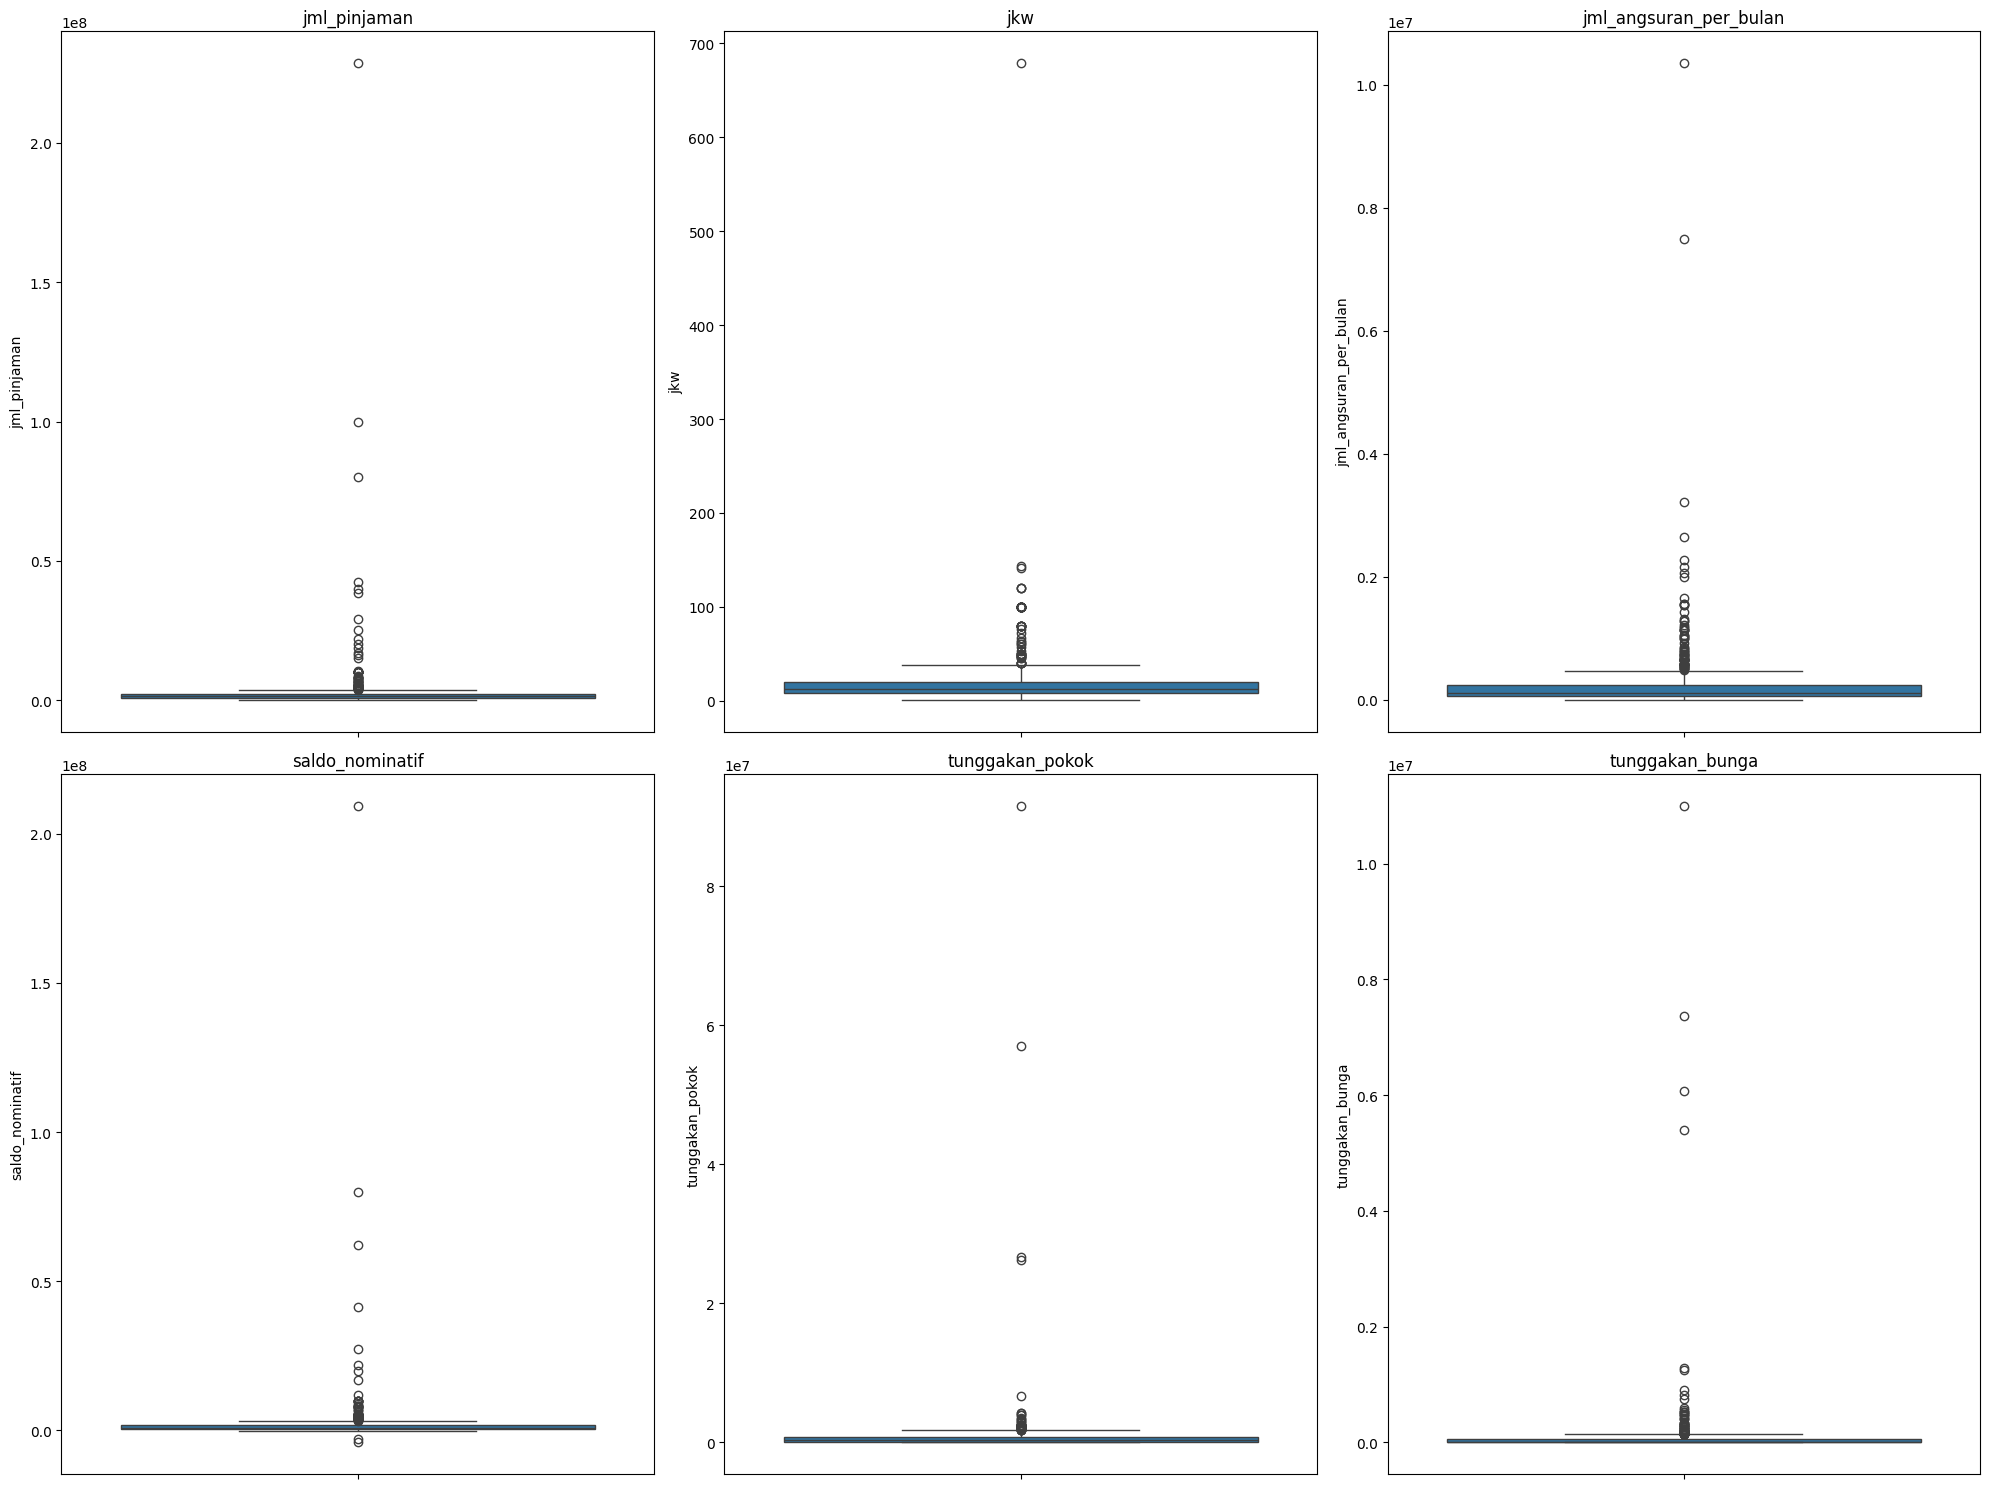

In [ ]:
# List of columns for boxplots
columns_to_plot = ['jml_pinjaman', 'jkw', 'jml_angsuran_per_bulan',
                   'saldo_nominatif', 'tunggakan_pokok', 'tunggakan_bunga']

# Create boxplots for selected columns
plt.figure(figsize=(20, 15))  # Adjust figure size as needed
for i, col in enumerate(columns_to_plot):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=dataset[col])
    plt.title(col)

plt.tight_layout()
plt.show()

Setelah melihat visualisasi data menggunakan box-plot. Ditemukan bahwa terdapat outlier pada variabel 'jkw', dimana beberapa data berada sangat jauh dari mayoritas data.

# Cleaning Data Training

In [ ]:
dataset.dropna(subset=['umur', 'bi_sektor_ekonomi'], inplace=True)
dataset.isnull().sum()

,0
nama_nasabah,0
jenis_kelamin,0
umur,0
jml_pinjaman,0
jkw,0
jml_angsuran_per_bulan,0
type_pinjaman,0
jenis_pinjaman,0
bi_sektor_ekonomi,0
col,0


Tidak ada lagi nilai null dalam dataset

*Handle Outliers Umur*

In [ ]:
# Pembersihan data
q1_umur = dataset['umur'].quantile(0.25)
q2_umur = dataset['umur'].quantile(0.50)
q3_umur = dataset['umur'].quantile(0.75)
iqr_umur = q3_umur - q1_umur
mean = dataset['umur'].mean()

minimum_umur = int(q1_umur - 1.5 * iqr_umur)
maximum_umur = int(q3_umur + 1.5 * iqr_umur)

def handle_outliers_umur(dataset):
  for index, row in dataset.iterrows():
    if row['umur'] < minimum_umur:
      dataset.at[index, 'umur'] = mean
    elif row['umur'] > maximum_umur:
      dataset.at[index, 'umur'] = maximum_umur

handle_outliers_umur(dataset)

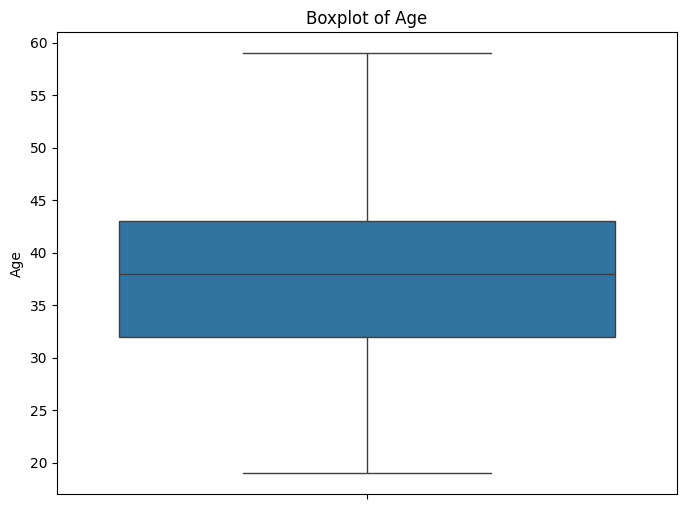

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=dataset['umur'])
plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()

Setelah menangani outlier dengan teknik IQR, variabel age tidak lagi memiliki outlier.

*Handle Outliers jkw*

In [ ]:
q1_jkw = dataset['jkw'].quantile(0.25)
q2_jkw = dataset['jkw'].quantile(0.50)
q3_jkw = dataset['jkw'].quantile(0.75)
iqr_jkw = q3_jkw - q1_jkw
mean = dataset['jkw'].mean()

minimum_jkw = int(q1_jkw - 1.5 * iqr_jkw)
maximum_jkw = int(q3_jkw + 1.5 * iqr_jkw)

def handle_outliers_jkw(dataset):
  for index, row in dataset.iterrows():
    if row['jkw'] < minimum_jkw:
      dataset.at[index, 'jkw'] = minimum_jkw
    elif row['jkw'] > maximum_jkw:
      dataset.at[index, 'jkw'] = maximum_jkw

handle_outliers_jkw(dataset)

<function matplotlib.pyplot.show(close=None, block=None)>

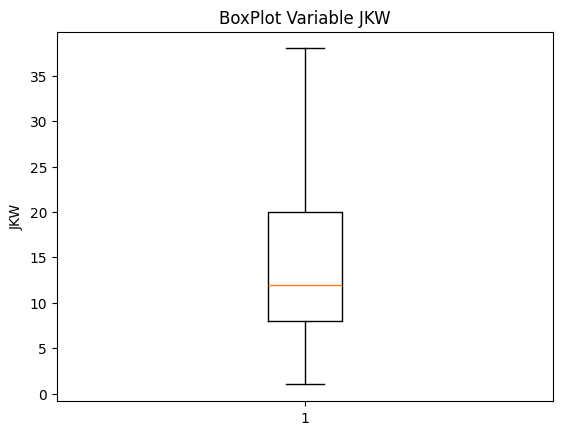

In [ ]:
plt.boxplot(dataset['jkw'])
plt.title("BoxPlot Variable JKW")
plt.ylabel("JKW")
plt.show

Setelah menangani outlier pada variabel jkw menggunakan metode IQR, variabel jkw tidak lagi memiliki outlier.

# Mengkonstruksi Data Training

In [ ]:
dataset['status_kredit'].sample(5)

,status_kredit
241,MACET
11,MACET
581,MACET
165,LANCAR
660,MACET


*Melakukan transformasi fitur status kartu kredit ke numerik:*

1. status_kredit: macet=1 | lancar=0
2. jenis_kelamin: P=1 | L=0

In [ ]:
le = LabelEncoder()

dataset['status_kredit'] = le.fit_transform(dataset['status_kredit'])
dataset['jenis_kelamin'] = le.fit_transform(dataset['jenis_kelamin'])

# Penentuan Objek Data

*Drop fitur nama_nasabah dan type_pinjaman*

In [ ]:
dataset = dataset.drop(['nama_nasabah', 'type_pinjaman'], axis=1)

*Melihat correlation matrix*

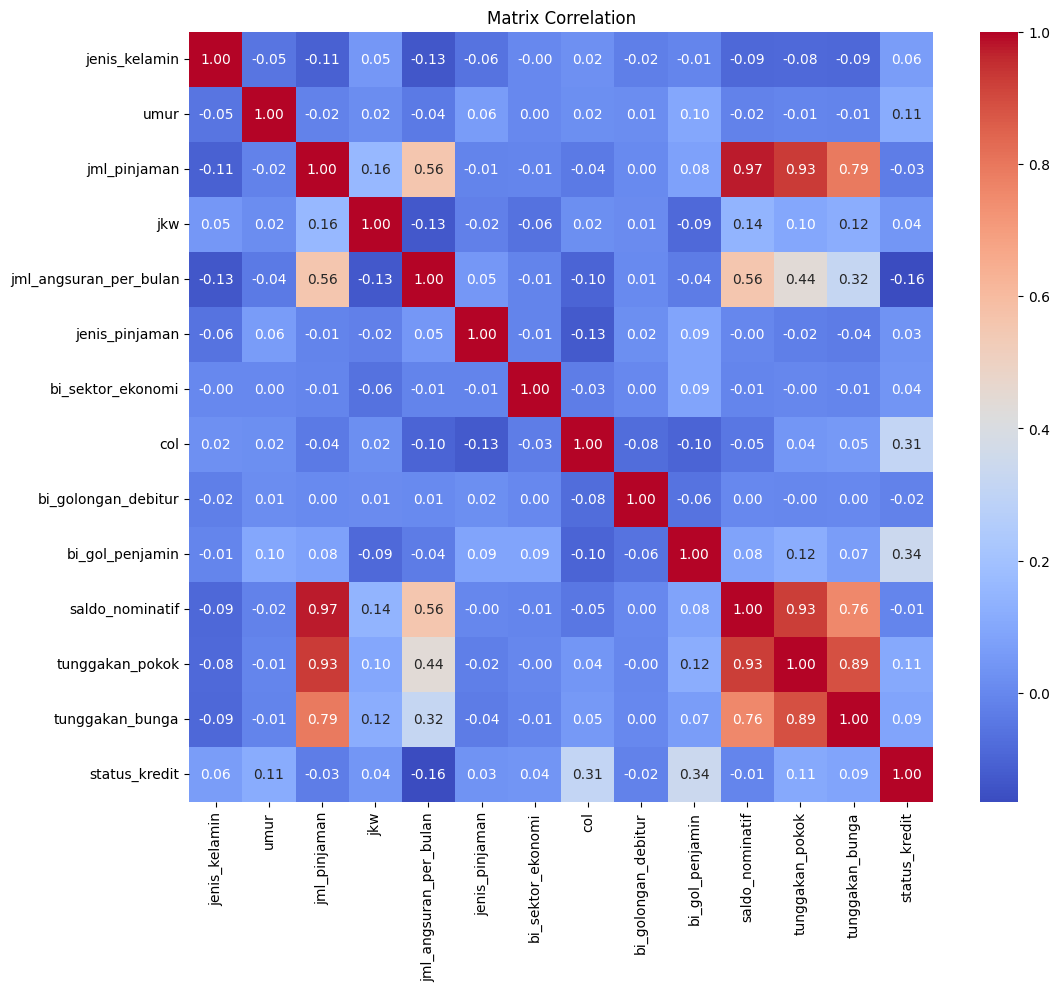

In [ ]:
correlation_matrix = dataset.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrix Correlation')
plt.show()

**Korelasi Tinggi:**

1. jml_pinjaman dengan saldo_nominatif: Korelasi sangat tinggi sebesar 0.97 menunjukkan bahwa nilai pinjaman total (jml_pinjaman) sangat berkaitan erat dengan saldo nominal. Hal ini masuk akal, karena biasanya saldo nominal sangat dipengaruhi oleh jumlah pinjaman awal.
2. tunggakan_pokok dengan tunggakan_bunga: Korelasi tinggi sebesar 0.89 menunjukkan bahwa jika ada tunggakan pada pokok pinjaman, sering kali ada tunggakan pada bunga juga.
3. jml_pinjaman dengan tunggakan_pokok (0.93) dan saldo_nominatif dengan tunggakan_pokok (0.93) menunjukkan bahwa semakin besar pinjaman atau saldo nominal, kemungkinan tunggakan pokok juga meningkat.

**Korelasi Sedang:**

1. jml_pinjaman dengan tunggakan_bunga (0.79) dan saldo_nominatif dengan tunggakan_bunga (0.76): Ini menunjukkan bahwa semakin tinggi jumlah pinjaman atau saldo, maka semakin besar kemungkinan tunggakan pada bunga.
2. bi_gol_penjamin dengan status_kredit (0.34) dan col dengan status_kredit (0.31): Ini menunjukkan bahwa faktor bi_gol_penjamin dan col (mungkin kolateral atau jaminan) cukup berhubungan dengan status kredit, yang bisa menjadi indikator risiko kredit.

**Korelasi Negatif:**

1. jml_angsuran_per_bulan dengan status_kredit (-0.16): Korelasi negatif ini menunjukkan bahwa semakin tinggi jumlah angsuran per bulan, kemungkinan status kredit akan memburuk sedikit, mungkin karena beban cicilan bulanan yang lebih tinggi dapat mempengaruhi kemampuan pembayaran.

In [ ]:
dataset

,jenis_kelamin,umur,jml_pinjaman,jkw,jml_angsuran_per_bulan,jenis_pinjaman,bi_sektor_ekonomi,col,bi_golongan_debitur,bi_gol_penjamin,saldo_nominatif,tunggakan_pokok,tunggakan_bunga,status_kredit
0,1,40.000000,345000.0,1,345000.00,301,6000.0,1,874,875,345000.0,345000.00,0.0,1
1,0,31.000000,350000.0,7,55716.00,301,6000.0,1,874,875,390000.0,111428.00,0.0,1
2,0,37.000000,649926.0,6,108321.00,301,6000.0,1,874,875,649926.0,216642.00,0.0,1
3,1,29.146597,459168.0,12,38264.00,301,6000.0,1,874,875,459168.0,382640.00,0.0,1
4,1,34.000000,3055499.0,8,381937.41,301,6000.0,1,874,875,3055499.0,1527749.48,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,0,38.000000,1000000.0,16,70000.00,301,6000.0,2,874,0,812500.0,812500.00,97500.0,1
762,1,36.000000,1000000.0,12,90833.37,301,6000.0,2,874,0,429000.0,429000.00,45000.0,1
763,0,28.000000,2000000.0,10,260000.00,301,6000.0,2,874,0,600000.0,600000.00,180000.0,1
764,1,31.000000,1312500.0,7,198750.00,301,6000.0,2,874,0,1312500.0,1312500.00,78750.0,1


# Data Testing Preprocessing

In [ ]:
testing = pd.read_csv("/content/creditapproval-testing.csv", sep=";")
testing

,nama_nasabah,jenis_kelamin,umur,jml_pinjaman,jkw,jml_angsuran_per_bulan,type_pinjaman,jenis_pinjaman,bi_sektor_ekonomi,col,bi_golongan_debitur,bi_gol_penjamin,saldo_nominatif,tunggakan_pokok,tunggakan_bunga,status_kredit
0,x767,P,36.0,"439000,01",6.0,"95300,01",100.0,301.0,6000.0,2.0,874.0,0.0,"345250,01","345250,01",31250,MACET
1,x768,P,42.0,"783333,34",9.0,"95370,37",100.0,301.0,6000.0,2.0,874.0,0.0,"691666,34","691666,34","66664,03",MACET
2,x769,P,34.0,5000000,24.0,"245833,41",100.0,301.0,6000.0,2.0,874.0,0.0,"3958333,35","3958333,35","749999,99",MACET
3,x770,L,32.0,1000000,12.0,"90833,37",100.0,301.0,6000.0,2.0,874.0,0.0,"60000,01","60000,01",7500,MACET
4,x771,P,34.0,2000000,12.0,"181666,74",100.0,301.0,6000.0,2.0,874.0,0.0,1100000,1100000,90000,MACET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print("Jenis data setiap fitur:")
print(testing.info())
print("----------------")
print("Statistik Deskriptif:")
print(testing.describe())

Jenis data setiap fitur:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   nama_nasabah            100 non-null    object 
 1   jenis_kelamin           100 non-null    object 
 2   umur                    100 non-null    float64
 3   jml_pinjaman            100 non-null    object 
 4   jkw                     100 non-null    float64
 5   jml_angsuran_per_bulan  100 non-null    object 
 6   type_pinjaman           100 non-null    float64
 7   jenis_pinjaman          100 non-null    float64
 8   bi_sektor_ekonomi       100 non-null    float64
 9   col                     100 non-null    float64
 10  bi_golongan_debitur     100 non-null    float64
 11  bi_gol_penjamin         100 non-null    float64
 12  saldo_nominatif         100 non-null    object 
 13  tunggakan_pokok         100 non-null    object 
 14  tunggakan_bunga  

*Mengatasi nilai null*

In [ ]:
testing.isnull().sum()

,0
nama_nasabah,104
jenis_kelamin,104
umur,104
jml_pinjaman,104
jkw,104
jml_angsuran_per_bulan,104
type_pinjaman,104
jenis_pinjaman,104
bi_sektor_ekonomi,104
col,104


In [ ]:
testing = testing.dropna(how='any')
testing.isna().sum()

,0
nama_nasabah,0
jenis_kelamin,0
umur,0
jml_pinjaman,0
jkw,0
jml_angsuran_per_bulan,0
type_pinjaman,0
jenis_pinjaman,0
bi_sektor_ekonomi,0
col,0


*Mengubah tipe data beberapa fitur*

In [ ]:
print(testing.dtypes)

nama_nasabah               object
jenis_kelamin              object
umur                      float64
jml_pinjaman               object
jkw                       float64
jml_angsuran_per_bulan     object
type_pinjaman             float64
jenis_pinjaman            float64
bi_sektor_ekonomi         float64
col                       float64
bi_golongan_debitur       float64
bi_gol_penjamin           float64
saldo_nominatif            object
tunggakan_pokok            object
tunggakan_bunga            object
status_kredit              object
dtype: object


In [ ]:
kolom_konversi = ['jml_pinjaman', 'jml_angsuran_per_bulan', 'saldo_nominatif', 'tunggakan_pokok', 'tunggakan_bunga']

# Mengganti koma dengan titik dan mengonversi ke float pada setiap kolom
testing[kolom_konversi] = testing[kolom_konversi].apply(lambda x: x.str.replace(',', '.').astype(float))

<ipython-input-159-0e3ef75e951d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing[kolom_konversi] = testing[kolom_konversi].apply(lambda x: x.str.replace(',', '.').astype(float))


In [ ]:
le = LabelEncoder()

testing['status_kredit'] = le.fit_transform(testing['status_kredit'])
testing['jenis_kelamin'] = le.fit_transform(testing['jenis_kelamin'])

<ipython-input-160-40a0cfb1c344>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing['status_kredit'] = le.fit_transform(testing['status_kredit'])
<ipython-input-160-40a0cfb1c344>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing['jenis_kelamin'] = le.fit_transform(testing['jenis_kelamin'])


In [ ]:
testing = testing.drop(['nama_nasabah', 'type_pinjaman'], axis=1)

# Penentuan Objek Data 2

In [ ]:
y_train = dataset['status_kredit']
X_train = dataset.drop(columns=['status_kredit'])

y_test = testing['status_kredit']
X_test = testing.drop(columns=['status_kredit'])

In [ ]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

['tunggakan_pokok', 0.48701102]
['col', 0.16079046]
['jml_pinjaman', 0.14647672]
['tunggakan_bunga', 0.065839455]
['saldo_nominatif', 0.04493066]
['bi_gol_penjamin', 0.03435598]
['jml_angsuran_per_bulan', 0.02664295]
['jenis_kelamin', 0.0139438305]
['umur', 0.011645177]
['jkw', 0.0083638225]
['bi_golongan_debitur', 0.0]
['bi_sektor_ekonomi', 0.0]
['jenis_pinjaman', 0.0]


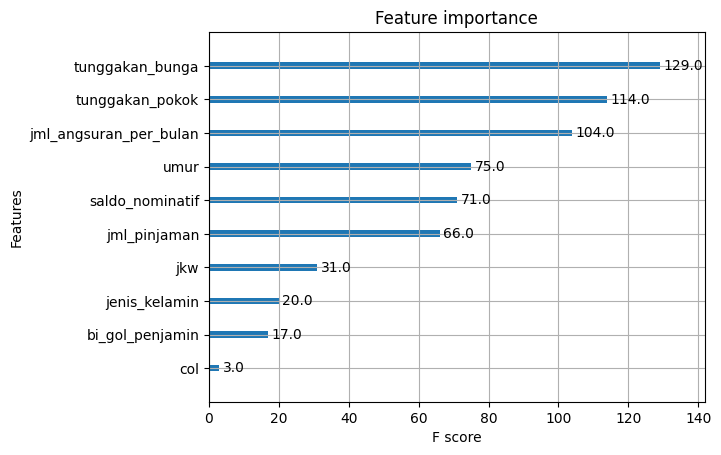

In [ ]:
sorted_idx = np.argsort(xgb_model.feature_importances_)[::-1]
for index in sorted_idx:
    print([X_train.columns[index], xgb_model.feature_importances_[index]])
plot_importance(xgb_model, max_num_features = 20)
plt.show()

Dari gambar diatas, terdapat 6 fitur teratas:


1.   tunggakan_bunga
2.   tunggakan_pokok
3.   jml_angsuran_per_bulan
4.   umur
5.   saldo_nominatif
6.   jml_pinjaman



# Train Model Menggunakan Semua Fitur

In [ ]:
dataset.columns

Index(['jenis_kelamin', 'umur', 'jml_pinjaman', 'jkw',
       'jml_angsuran_per_bulan', 'jenis_pinjaman', 'bi_sektor_ekonomi', 'col',
       'bi_golongan_debitur', 'bi_gol_penjamin', 'saldo_nominatif',
       'tunggakan_pokok', 'tunggakan_bunga', 'status_kredit'],
      dtype='object')

*RandomForestModel*

Training menggunakan semua variabel

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rdf_model = RandomForestClassifier(random_state=42)
rdf_model.fit(X_train, y_train)

y_train_pred = rdf_model.predict(X_train)

# Menghitung akurasi pada data training
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Menampilkan classification report pada data training
print("Classification Report (Training Data):")
print(classification_report(y_train, y_train_pred))

Training Accuracy: 1.0
Classification Report (Training Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       210
           1       1.00      1.00      1.00       554

    accuracy                           1.00       764
   macro avg       1.00      1.00      1.00       764
weighted avg       1.00      1.00      1.00       764



*LogisticRegression Model*

Training menggunakan semua variabel

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000, verbose=1, warm_start=True)

lr_model.fit(X_train, y_train)

y_train_pred = lr_model.predict(X_train)

# Menghitung akurasi pada data training
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Menampilkan classification report pada data training
print("Classification Report (Training Data):")
print(classification_report(y_train, y_train_pred))

Training Accuracy: 0.9214659685863874
Classification Report (Training Data):
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       210
           1       0.95      0.95      0.95       554

    accuracy                           0.92       764
   macro avg       0.90      0.90      0.90       764
weighted avg       0.92      0.92      0.92       764



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Test Model Menggunakan Semua Fitur

*RandomForest Model*

In [ ]:
y_pred = rdf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.85      0.95      0.90        41
           1       0.96      0.88      0.92        59

    accuracy                           0.91       100
   macro avg       0.91      0.92      0.91       100
weighted avg       0.92      0.91      0.91       100



*LogisticRegression Model*

In [ ]:
y_pred = lr_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.75      0.95      0.84        41
           1       0.96      0.78      0.86        59

    accuracy                           0.85       100
   macro avg       0.85      0.87      0.85       100
weighted avg       0.87      0.85      0.85       100



# Training Model Menggunakan Pycaret Dengan Semua Fitur

In [ ]:
from pycaret.classification import *

# Inisialisasi setup PyCaret
clf = setup(data = dataset, target = 'status_kredit')

# Membandingkan model
compare_models()

# Memilih model terbaik (misalnya, model dengan akurasi tertinggi)
best_model = create_model('rf') # Ganti 'rf' dengan nama model terbaik dari compare_models

# Melakukan tuning hyperparameter
tuned_model = tune_model(best_model)

# Mengevaluasi model
evaluate_model(tuned_model)

# Melakukan prediksi pada data testing
predictions = predict_model(tuned_model, data=testing)

# Menampilkan hasil prediksi
predictions

# Train Model Menggunakan 6 Fitur Teratas

In [ ]:
dataset.columns

Index(['jenis_kelamin', 'umur', 'jml_pinjaman', 'jkw',
       'jml_angsuran_per_bulan', 'jenis_pinjaman', 'bi_sektor_ekonomi', 'col',
       'bi_golongan_debitur', 'bi_gol_penjamin', 'saldo_nominatif',
       'tunggakan_pokok', 'tunggakan_bunga', 'status_kredit'],
      dtype='object')

In [ ]:
y_train = dataset['status_kredit']
X_train = dataset.drop(columns=['status_kredit', 'jenis_kelamin', 'umur', 'jkw',
      'bi_sektor_ekonomi', 'col', 'bi_golongan_debitur', 'bi_gol_penjamin',
      ])

y_test = testing['status_kredit']
X_test = testing.drop(columns=['status_kredit', 'jenis_kelamin', 'umur', 'jkw',
      'bi_sektor_ekonomi', 'col', 'bi_golongan_debitur', 'bi_gol_penjamin',
      ])

*RandomForestModel*

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rdf_model = RandomForestClassifier(random_state=42)
rdf_model.fit(X_train, y_train)

y_train_pred = rdf_model.predict(X_train)

# Menghitung akurasi pada data training
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Menampilkan classification report pada data training
print("Classification Report (Training Data):")
print(classification_report(y_train, y_train_pred))

Training Accuracy: 0.9986910994764397
Classification Report (Training Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       210
           1       1.00      1.00      1.00       554

    accuracy                           1.00       764
   macro avg       1.00      1.00      1.00       764
weighted avg       1.00      1.00      1.00       764



*LogisticRegression Model*

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000, verbose=1, warm_start=True)

lr_model.fit(X_train, y_train)

y_train_pred = lr_model.predict(X_train)

# Menghitung akurasi pada data training
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Menampilkan classification report pada data training
print("Classification Report (Training Data):")
print(classification_report(y_train, y_train_pred))

Training Accuracy: 0.9345549738219895
Classification Report (Training Data):
              precision    recall  f1-score   support

           0       0.90      0.85      0.88       210
           1       0.95      0.97      0.96       554

    accuracy                           0.93       764
   macro avg       0.92      0.91      0.92       764
weighted avg       0.93      0.93      0.93       764



# Test Model Menggunakan 6 Fitur Teratas

*RandomForest Model*

In [ ]:
y_pred = rdf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.83      0.98      0.90        41
           1       0.98      0.86      0.92        59

    accuracy                           0.91       100
   macro avg       0.91      0.92      0.91       100
weighted avg       0.92      0.91      0.91       100



*LogisticRegression Model*

In [ ]:
y_pred = lr_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.80      0.90      0.85        41
           1       0.93      0.85      0.88        59

    accuracy                           0.87       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.88      0.87      0.87       100



# Training Model Menggunakan Pycaret Dengan 6 Fitur Teratas

In [ ]:
dataset = dataset.drop(columns=['jenis_kelamin', 'umur', 'jkw',
      'bi_sektor_ekonomi', 'col', 'bi_golongan_debitur', 'bi_gol_penjamin',
      ])

testing = testing.drop(columns=['jenis_kelamin', 'umur', 'jkw',
      'bi_sektor_ekonomi', 'col', 'bi_golongan_debitur', 'bi_gol_penjamin',
      ])

In [ ]:
from pycaret.classification import *

# Inisialisasi setup PyCaret
clf = setup(data = dataset, target = 'status_kredit')

# Membandingkan model
compare_models()

# Memilih model terbaik (misalnya, model dengan akurasi tertinggi)
best_model = create_model('rf') # Ganti 'rf' dengan nama model terbaik dari compare_models

# Melakukan tuning hyperparameter
tuned_model = tune_model(best_model)

# Mengevaluasi model
evaluate_model(tuned_model)

# Melakukan prediksi pada data testing
predictions = predict_model(tuned_model, data=testing)

# Menampilkan hasil prediksi
predictions

,Description,Value
0,Session id,2034
1,Target,status_kredit
2,Target type,Binary
3,Original data shape,"(764, 7)"
4,Transformed data shape,"(764, 7)"
5,Transformed train set shape,"(534, 7)"
6,Transformed test set shape,"(230, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9682,0.9897,0.9871,0.9705,0.9784,0.9176,0.9202,0.3680
xgboost,Extreme Gradient Boosting,0.9625,0.9807,0.9820,0.9681,0.9746,0.9033,0.9066,0.0720
et,Extra Trees Classifier,0.9607,0.9799,0.9821,0.9656,0.9734,0.8982,0.9011,0.2130
lightgbm,Light Gradient Boosting Machine,0.9607,0.9842,0.9794,0.9680,0.9732,0.8990,0.9017,0.1300
gbc,Gradient Boosting Classifier,0.9588,0.9820,0.9768,0.9681,0.9719,0.8942,0.8977,0.3910
ada,Ada Boost Classifier,0.9531,0.9585,0.9691,0.9678,0.9678,0.8813,0.8853,0.4790
dt,Decision Tree Classifier,0.9400,0.9393,0.9457,0.9721,0.9579,0.8536,0.8589,0.0290
lr,Logistic Regression,0.9362,0.9688,0.9665,0.9481,0.9566,0.8362,0.8409,0.7370
svm,SVM - Linear Kernel,0.9158,0.9597,0.9561,0.9335,0.9428,0.7790,0.7925,0.0340
knn,K Neighbors Classifier,0.8970,0.9448,0.9226,0.9347,0.9283,0.7455,0.7472,0.0490


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9815,1.0000,0.9744,1.0000,0.9870,0.9548,0.9558
1,0.9815,0.9957,1.0000,0.9750,0.9873,0.9529,0.9539
2,0.9815,0.9949,0.9744,1.0000,0.9870,0.9548,0.9558
3,0.9259,0.9632,1.0000,0.9070,0.9512,0.7989,0.8155
4,0.9811,0.9872,1.0000,0.9750,0.9873,0.9503,0.9515
5,0.9623,0.9835,0.9744,0.9744,0.9744,0.9029,0.9029
6,0.9434,0.9927,0.9744,0.9500,0.9620,0.8510,0.8520
7,0.9623,0.9947,0.9737,0.9737,0.9737,0.9070,0.9070
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9630,0.9983,0.9487,1.0000,0.9737,0.9113,0.9149
1,0.9815,0.9966,1.0000,0.9750,0.9873,0.9529,0.9539
2,0.9444,0.9915,0.9487,0.9737,0.9610,0.8643,0.8652
3,0.9444,0.9641,1.0000,0.9286,0.9630,0.8525,0.8619
4,0.9434,0.9817,0.9487,0.9737,0.9610,0.8577,0.8586
5,0.9057,0.9615,0.9231,0.9474,0.9351,0.7628,0.7636
6,0.9434,0.9890,0.9744,0.9500,0.9620,0.8510,0.8520
7,0.9434,0.9895,0.9474,0.9730,0.9600,0.8633,0.8642
8,0.9623,0.9965,0.9737,0.9737,0.9737,0.9070,0.9070


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9000,0.9349,0.8475,0.9804,0.9091,0.7993,0.8098


,jml_pinjaman,jml_angsuran_per_bulan,jenis_pinjaman,saldo_nominatif,tunggakan_pokok,tunggakan_bunga,status_kredit,prediction_label,prediction_score
0,4.390000e+05,95300.007812,301.0,3.452500e+05,3.452500e+05,31250.00000,1,1,1.000
1,7.833333e+05,95370.367188,301.0,6.916663e+05,6.916663e+05,66664.03125,1,1,1.000
2,5.000000e+06,245833.406250,301.0,3.958333e+06,3.958333e+06,750000.00000,1,1,0.990
3,1.000000e+06,90833.367188,301.0,6.000001e+04,6.000001e+04,7500.00000,1,0,0.520
4,2.000000e+06,181666.734375,301.0,1.100000e+06,1.100000e+06,90000.00000,1,1,1.000
...,...,...,...,...,...,...,...,...,...
95,5.000000e+06,566666.750000,301.0,5.000000e+06,0.000000e+00,0.00000,0,0,1.000
96,1.000000e+06,18167.060547,301.0,2.644334e+05,2.644334e+05,24000.00000,1,1,0.984
97,1.000000e+06,90761.367188,301.0,7.271893e+05,7.271893e+05,59424.00000,1,1,1.000
98,5.000000e+05,67452.000000,301.0,5.000000e+05,5.000000e+05,39616.00000,1,1,0.950
